# Main Code

Tiffany Tran-Heinerich. 
Last update: 03/03/2024. 

Emrys Duclos. 
Last update: .

In [104]:
pip install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 KB 4.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=137319 sha256=5374f8f8285c4fd427bb3a1635f8b64469deb6e5b1590e5a419a4c72edc07808
  Stored in directory: /Users/tiffanytran-heinerich/Library/Caches/pip/wheels/ea/af/da/2bdd7308f7b334429a558df1e36d31864cd19c07ede92ddf0e
Successfully built odfpy
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Demography evolution

Data from the ONS.

In [4]:
file = "Data/ONS - Population/ukpopulationestimates.xlsx"
table = "Table 11"
pop_eng = pd.read_excel(file, sheet_name=table).drop(index=[0,1]).set_index("Contents")
pop_eng.columns = pop_eng.loc["Age"]
pop_eng = pop_eng.drop(index="Age")

display(pop_eng)

Age,Sex,Mid-2022,Mid-2021,Mid-2020,Mid-2019,Mid-2018,Mid-2017,Mid-2016,Mid-2015,Mid-2014,...,Mid-1980,Mid-1979,Mid-1978,Mid-1977,Mid-1976,Mid-1975,Mid-1974,Mid-1973,Mid-1972,Mid-1971
Contents,,,,,,,,,,,,,,,,,,,,,
All Ages,Persons,57106398,56554891,56325961,56230056,55924528,55619548,55289034,54808676,54370319,...,46787200,46698100,46638200,46639800,46659900,46674400,46682700,46686200,46571900,46411700
0,Persons,596306,579361,599361,614765,630785,647776,664409,658624,660583,...,602100,582300,535800,526800,551400,577100,600800,650400,694200,739100
1,Persons,592565,602297,615483,629886,646396,664447,660439,662946,676571,...,579700,533900,525600,548000,574100,597800,646200,690800,734600,716400
2,Persons,615537,614335,626334,644113,662647,659161,663711,677849,695648,...,533600,525200,547300,571200,595300,643100,686900,732400,714500,749700
3,Persons,627205,623636,641058,661188,656871,662388,678376,696830,688869,...,524100,547100,570500,592100,640600,683100,729300,712900,747200,754300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Females,120255,117517,113360,113482,115183,115597,115696,111750,109675,...,60600,60700,59200,58100,56500,57300,57700,54300,54100,53300
87,Females,107758,103469,102655,105624,104898,105120,101682,99337,99136,...,52300,50600,49700,48200,48800,49500,46200,45800,45700,43700
88,Females,93505,92307,94312,94721,94083,91245,89192,88484,89783,...,43100,42100,40800,41200,41900,39000,38600,38300,36600,35700


* `pop_eng` Give us the total population in england by age and sex (total, females, males)

But we don't really care about the sex/gendre => therefore we'll drop females and males rows and only keep the totals by age. 

* `pop_tot_eng` gives us the total population by age, each year. 

In [5]:
pop_tot_eng = pop_eng[pop_eng["Sex"]=="Persons"]
pop_tot_eng = pop_tot_eng.drop(columns="Sex")
pop_tot_eng = pop_tot_eng.drop(index="All Ages") # we don't need the calculation of total here 

# We have to inverse the DataFrame : going from 2022 -> 1971, we want it from 1971 -> 2022
pop_tot_eng = pop_tot_eng.iloc[:,::-1]

display(pop_tot_eng)

Age,Mid-1971,Mid-1972,Mid-1973,Mid-1974,Mid-1975,Mid-1976,Mid-1977,Mid-1978,Mid-1979,Mid-1980,...,Mid-2013,Mid-2014,Mid-2015,Mid-2016,Mid-2017,Mid-2018,Mid-2019,Mid-2020,Mid-2021,Mid-2022
Contents,,,,,,,,,,,,,,,,,,,,,
0,739100,694200,650400,600800,577100,551400,526800,535800,582300,602100,...,673922,660583,658624,664409,647776,630785,614765,599361,579361,596306
1,716400,734600,690800,646200,597800,574100,548000,525600,533900,579700,...,693992,676571,662946,660439,664447,646396,629886,615483,602297,592565
2,749700,714500,732400,686900,643100,595300,571200,547300,525200,533600,...,686294,695648,677849,663711,659161,662647,644113,626334,614335,615537
3,754300,747200,712900,729300,683100,640600,592100,570500,547100,524100,...,675965,688869,696830,678376,662388,656871,661188,641058,623636,627205
4,776000,751500,745200,710900,726800,680600,637900,591500,570300,546500,...,667603,678422,691009,697328,677320,660445,655582,658912,639467,635769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,73100,74000,73700,77900,78200,76800,79200,79200,81800,81500,...,176046,178163,182735,189876,192086,193455,191888,192098,200094,204960
87,59200,61700,61800,62000,65800,65700,64800,67000,66600,69500,...,157408,159095,159411,164489,170595,172052,175438,171406,173198,181186
88,48100,48900,51000,51300,51500,54900,54700,54100,56100,55800,...,137327,140544,140303,141542,145793,150792,153463,154331,152109,154369


Plotting the evolution of newborns in England between 1971 and 2022. 

Age,Mid-1971,Mid-1972,Mid-1973,Mid-1974,Mid-1975,Mid-1976,Mid-1977,Mid-1978,Mid-1979,Mid-1980,...,Mid-2013,Mid-2014,Mid-2015,Mid-2016,Mid-2017,Mid-2018,Mid-2019,Mid-2020,Mid-2021,Mid-2022
Contents,,,,,,,,,,,,,,,,,,,,,
0,739100,694200,650400,600800,577100,551400,526800,535800,582300,602100,...,673922,660583,658624,664409,647776,630785,614765,599361,579361,596306
1,716400,734600,690800,646200,597800,574100,548000,525600,533900,579700,...,693992,676571,662946,660439,664447,646396,629886,615483,602297,592565
2,749700,714500,732400,686900,643100,595300,571200,547300,525200,533600,...,686294,695648,677849,663711,659161,662647,644113,626334,614335,615537
3,754300,747200,712900,729300,683100,640600,592100,570500,547100,524100,...,675965,688869,696830,678376,662388,656871,661188,641058,623636,627205
4,776000,751500,745200,710900,726800,680600,637900,591500,570300,546500,...,667603,678422,691009,697328,677320,660445,655582,658912,639467,635769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,73100,74000,73700,77900,78200,76800,79200,79200,81800,81500,...,176046,178163,182735,189876,192086,193455,191888,192098,200094,204960
87,59200,61700,61800,62000,65800,65700,64800,67000,66600,69500,...,157408,159095,159411,164489,170595,172052,175438,171406,173198,181186
88,48100,48900,51000,51300,51500,54900,54700,54100,56100,55800,...,137327,140544,140303,141542,145793,150792,153463,154331,152109,154369


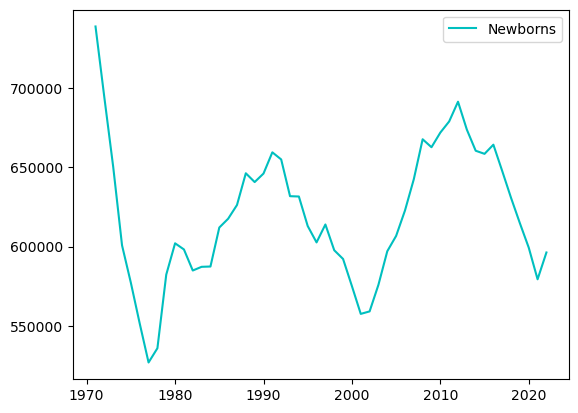

In [6]:
years = np.arange(1971,2023)

display(pop_tot_eng)

ax = sns.lineplot(y=pop_tot_eng.loc[0],x=years,label="Newborns",color='c')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')

fig = ax.get_figure()
fig.savefig("Output/Newborns-Eng-1971-2022.png",dpi=300,bbox_inches="tight")

Plotting the evolution of the total population in England between 1971 and 2022. 

Age,Mid-1971,Mid-1972,Mid-1973,Mid-1974,Mid-1975,Mid-1976,Mid-1977,Mid-1978,Mid-1979,Mid-1980,...,Mid-2013,Mid-2014,Mid-2015,Mid-2016,Mid-2017,Mid-2018,Mid-2019,Mid-2020,Mid-2021,Mid-2022
Total population,46411700,46571900,46686200,46682700,46674400,46659900,46639800,46638200,46698100,46787200,...,53918686,54370319,54808676,55289034,55619548,55924528,56230056,56325961,56554891,57106398


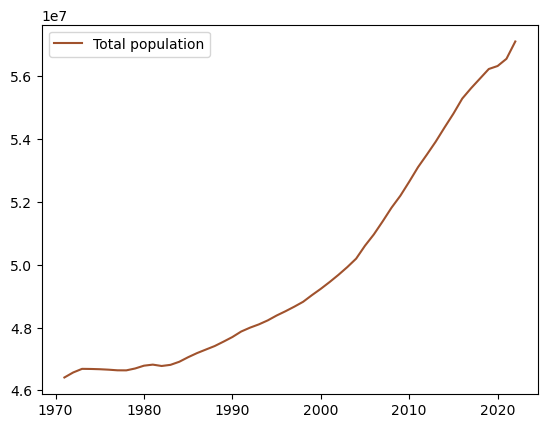

In [7]:
years = np.arange(1971,2023)

#display(pop_tot_eng)
pop_sum_eng = pd.DataFrame(pop_tot_eng.sum(axis=0)).rename(columns={0:"Total population"}).T
display(pop_sum_eng)

ax = sns.lineplot(y=pop_sum_eng.loc['Total population'],x=years,label="Total population",color='sienna')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='sci', axis='y')

fig = ax.get_figure()
fig.savefig("Output/Pop-sum-Eng-1971-2022.png",dpi=300,bbox_inches="tight")


## Dwelling stock : net additional dwelling (uk gov data)

Let's explore our data. 

In [8]:
file = "Data/GOV UK/Eng_net-add-dwe_by-district-tenure.ods"
Dwe_net_add_eng = pd.read_excel(file, engine="odf")
Dwe_net_add_eng_12_13 = pd.read_excel(file, engine="odf",sheet_name="2012-13")
Dwe_net_add_eng_13_14 = pd.read_excel(file, engine="odf",sheet_name="2013-14")
Dwe_net_add_eng_14_15 = pd.read_excel(file, engine="odf",sheet_name="2014-15")
Dwe_net_add_eng_15_16 = pd.read_excel(file, engine="odf",sheet_name="2015-16")
Dwe_net_add_eng_16_17 = pd.read_excel(file, engine="odf",sheet_name="2016-17")
Dwe_net_add_eng_17_18 = pd.read_excel(file, engine="odf",sheet_name="2017-18")
Dwe_net_add_eng_18_19 = pd.read_excel(file, engine="odf",sheet_name="2018-19")
Dwe_net_add_eng_19_20 = pd.read_excel(file, engine="odf",sheet_name="2019-20")
Dwe_net_add_eng_20_21 = pd.read_excel(file, engine="odf",sheet_name="2020-21")
Dwe_net_add_eng_21_22 = pd.read_excel(file, engine="odf",sheet_name="2021-22")
Dwe_net_add_eng_22_23 = pd.read_excel(file, engine="odf",sheet_name="2022-23")

display(Dwe_net_add_eng)
display(Dwe_net_add_eng_12_13)

,"Net Additional Dwellings, Table 123: net additional dwellings, component flows of, by local authority district, England, 2012-13 to 2022-23",Unnamed: 1
0,This worksheet contains one table.,NaN
1,Worksheet name,Worksheet contents
2,Cover sheet,Sheet containing background information for th...
3,Notes,Sheet containing notes included in the tables.
4,2012-13,Annual net additional dwellings and components...
5,2013-14,Annual net additional dwellings and components...
6,2014-15,Annual net additional dwellings and components...
7,2015-16,Annual net additional dwellings and components...
8,2016-17,Annual net additional dwellings and components...
9,2017-18,Annual net additional dwellings and components...


,"Table 123 Housing supply; net additional dwellings, component flows of, by local authority district, England, 2012-13",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,This worksheet contains one table. All figures...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Back to contents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DCLG code,FormerONS code,CurrentONS code,Authority Data,New build,Net conversions,Net Change of use,Net other gains and losses,Demolitions,Adjustment to Census 2021,Net Additions
3,NaN,NaN,E92000001,England,118536,4095,12778,1369,12056,5889.109632,130611.109632
4,NaN,NaN,NaN,Unitary Authorities,28497,701,3460,1086,2593,537.68097,31688.68097
...,...,...,...,...,...,...,...,...,...,...,...
362,J1860,47UC,E07000235,Malvern Hills,159,-1,22,1,5,-14.4,161.6
363,Q1825,47UD,E07000236,Redditch,120,3,6,0,2,5.8,132.8
364,D1835,47UE,E07000237,Worcester,118,1,22,0,0,5.9,146.9
365,H1840,47UF,E07000238,Wychavon,317,4,167,42,24,8.8,514.8


Let's clean up our new tables. 

In [9]:
DNA_eng_12_13 = Dwe_net_add_eng_12_13.copy(deep=True).drop(index=[0,1])
DNA_eng_13_14 = Dwe_net_add_eng_13_14.copy(deep=True).drop(index=[0,1])
DNA_eng_14_15 = Dwe_net_add_eng_14_15.copy(deep=True).drop(index=[0,1])
DNA_eng_15_16 = Dwe_net_add_eng_15_16.copy(deep=True).drop(index=[0,1])
DNA_eng_16_17 = Dwe_net_add_eng_16_17.copy(deep=True).drop(index=[0,1])
DNA_eng_17_18 = Dwe_net_add_eng_17_18.copy(deep=True).drop(index=[0,1])
DNA_eng_18_19 = Dwe_net_add_eng_18_19.copy(deep=True).drop(index=[0,1])
DNA_eng_19_20 = Dwe_net_add_eng_19_20.copy(deep=True).drop(index=[0,1])
DNA_eng_20_21 = Dwe_net_add_eng_20_21.copy(deep=True).drop(index=[0,1])
DNA_eng_21_22 = Dwe_net_add_eng_21_22.copy(deep=True).drop(index=[0,1])
DNA_eng_22_23 = Dwe_net_add_eng_22_23.copy(deep=True).drop(index=[0,1])

#print("First try")
#display(DNA_eng_12_13)
#display(DNA_eng_14_15)

list_DNA_eng = {
    "_12_13":DNA_eng_12_13,
    "_13_14":DNA_eng_13_14,
    "_14_15":DNA_eng_14_15,
    "_15_16":DNA_eng_15_16,
    "_16_17":DNA_eng_16_17,
    "_17_18":DNA_eng_17_18,
    "_18_19":DNA_eng_18_19,
    "_19_20":DNA_eng_19_20,
    "_20_21":DNA_eng_20_21,
    "_21_22":DNA_eng_21_22,
    "_22_23":DNA_eng_22_23
}

def change_col(DNA):
    DNA.columns = DNA.loc[2]
    DNA.drop(index=[2],inplace=True)
    return DNA

def erase_notes(DNA):
    DNA[' Authority Data'] = DNA[' Authority Data'].str.strip(' [note 1]')
    DNA[' Authority Data'] = DNA[' Authority Data'].str.strip(' [note 2]')
    DNA[' Authority Data'] = DNA[' Authority Data'].str.strip(' [note 3]')
    DNA[' Authority Data'] = DNA[' Authority Data'].str.strip(' [note 8]')
    DNA[' Authority Data'] = DNA[' Authority Data'].str.strip(' [note]')
    return DNA

for years in list_DNA_eng:
    list_DNA_eng[years] = change_col(list_DNA_eng[years])
    list_DNA_eng[years] = erase_notes(list_DNA_eng[years])

#print("Second try with the columns defined")
#display(DNA_eng_12_13)

def merge2(data1,data2,suffixe):
    merging_columns = ["DCLG code","FormerONS code","CurrentONS code"," Authority Data"]
    data2 = data2.rename(columns={c: c+suffixe for c in data2.columns if c not in merging_columns})
    data_new = pd.merge(data1,data2,
        on=merging_columns,
        how='outer')
    return data_new

merging_columns = ["DCLG code","FormerONS code","CurrentONS code"," Authority Data"]
DNA_eng_12_13 = DNA_eng_12_13.rename(columns={c: c+'_12_13' for c in DNA_eng_12_13.columns if c not in merging_columns})
DNA_eng_12_23 = merge2(DNA_eng_12_13,DNA_eng_13_14,'_13_14')

for key in list(list_DNA_eng.keys())[2:]:
    DNA_eng_12_23 = merge2(DNA_eng_12_23,list_DNA_eng[key],key)

DNA_eng_12_23.set_index(" Authority Data",inplace=True)
DNA_eng_12_23.columns.name = None
display(DNA_eng_12_23)


,DCLG code,FormerONS code,CurrentONS code,New build_12_13,Net conversions_12_13,Net Change of use_12_13,Net other gains and losses_12_13,Demolitions_12_13,Adjustment to Census 2021_12_13,Net Additions_12_13,...,Of which under PDR: storage to residential_22_23,Of which under PDR: light industrial use to residential_22_23,"Of which under PDR: commercial, business and service to residential_22_23",Of which under PDR: any other to residential_22_23,Of which under PDR: unspecified to residential_22_23,Of which under PDR: total to residential_22_23,Net other gains and losses_22_23,Demolitions_22_23,Of which under PDR_22_23,Net Additions_22_23
Authority Data,,,,,,,,,,,,,,,,,,,,,
England,NaN,NaN,E92000001,118536,4095,12778,1369,12056,5889.109632,130611.109632,...,59,103,451,427,15,9492,641,5474,5,234397
Unitary Authorities,NaN,NaN,NaN,28497,701,3460,1086,2593,537.68097,31688.68097,...,1,28,86,217,2,2741,377,2359,3,62508
Bath and North East Somerset UA,F0114,00HA,E06000022,442,8,101,1,2,9,559,...,0,0,0,0,0,14,1,7,0,490
Bedford UA,K0235,00KB,E06000055,568,20,69,5,8,33.5,687.5,...,0,1,0,4,0,65,0,13,0,1465
Blackburn with Darwen UA,M2372,00EX,E06000008,215,5,9,0,32,20.1,217.1,...,0,2,11,0,0,14,1,10,0,553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
East Suffolk,A0011,A0011,E07000244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,1,1,0,12,3,24,0,812
West Suffolk,A0012,A0012,E07000245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,74,0,4,84,0,10,0,989
Buckinghamshire UA,A0016,A0016,E06000060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,260,0,220,0,3718


# Plotting the net additional dwelling (uk gov data)

Let's plot some data from our merged table: 

1. The number of new dwellings  
2. The number of destroyed dwellings 
3. Net additions

Authority Data,England,Unitary Authorities,Bath and North East Somerset UA,Bedford UA,Blackburn with Darwen UA,...,East Suffolk,West Suffolk,Buckinghamshire UA,North Northamptonshire UA,West Northamptonshire UA
New build_12_13,118536,28497,442,568,215,...,NaN,NaN,NaN,NaN,NaN
New build_13_14,130344,30637,480,903,237,...,NaN,NaN,NaN,NaN,NaN
New build_14_15,155078,36814,521,727,210,...,NaN,NaN,NaN,NaN,NaN
New build_15_16,163939,37301,726,843,76,...,NaN,NaN,NaN,NaN,NaN
New build_16_17,183571,41824,699,993,101,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
New build_18_19,214413,47610,909,1091,387,...,NaN,NaN,NaN,NaN,NaN
New build_19_20,219120,49075,1118,907,282,...,735,816,NaN,NaN,NaN
New build_20_21,191819,43297,635,816,396,...,641,842,1678,NaN,NaN
New build_21_22,211665,53526,386,945,396,...,716,829,2322,1477,1982


/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/761281048.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


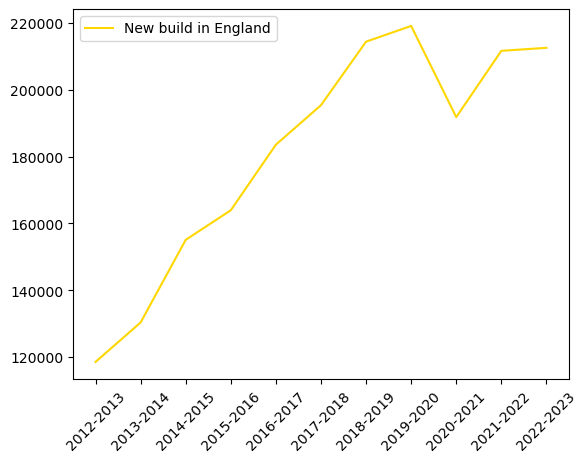

In [10]:
#display(DNA_eng_12_23.columns.to_list()[30:50])

pd.set_option("display.max_columns", 10) 
pd.set_option("display.max_rows", 10)

category = "New build"
Dwe_net_new_build = DNA_eng_12_23[[category+'_12_13',category+'_13_14',category+'_14_15',category+'_15_16',category+'_16_17',category+'_17_18',category+'_18_19',category+'_19_20',category+'_20_21',category+'_21_22',category+'_22_23']].copy()
Dwe_net_new_build = Dwe_net_new_build.T
display(Dwe_net_new_build)

years = np.arange(2012,2023)
time = [str(i)+'-'+str(i+1) for i in years]

ax = sns.lineplot(y=Dwe_net_new_build["England"],x=time,label="New build in England",color='gold')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)

fig = ax.get_figure()
fig.savefig("Output/New-Build-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

Authority Data,England,Unitary Authorities,Bath and North East Somerset UA,Bedford UA,Blackburn with Darwen UA,...,East Suffolk,West Suffolk,Buckinghamshire UA,North Northamptonshire UA,West Northamptonshire UA
Demolitions_12_13,12056,2593,2,8,32,...,NaN,NaN,NaN,NaN,NaN
Demolitions_13_14,12064,3482,7,12,18,...,NaN,NaN,NaN,NaN,NaN
Demolitions_14_15,10611,2331,0,6,0,...,NaN,NaN,NaN,NaN,NaN
Demolitions_15_16,10424,1943,2,0,0,...,NaN,NaN,NaN,NaN,NaN
Demolitions_16_17,9818,2721,3,52,0,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Demolitions_18_19,7961,1585,12,8,10,...,NaN,NaN,NaN,NaN,NaN
Demolitions_19_20,8332,1360,29,6,0,...,1,7,NaN,NaN,NaN
Demolitions_20_21,5478,1694,11,27,4,...,28,34,101,NaN,NaN
Demolitions_21_22,5729,1753,7,26,4,...,26,8,162,12,5


/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/4106556220.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


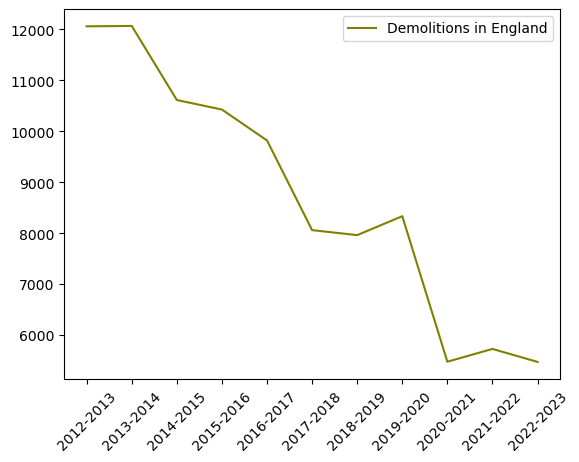

In [11]:
#display(DNA_eng_12_23.columns.to_list()[30:50])

category = "Demolitions"
Dwe_net_demolitions = DNA_eng_12_23[[category+'_12_13',category+'_13_14',category+'_14_15',category+'_15_16',category+'_16_17',category+'_17_18',category+'_18_19',category+'_19_20',category+'_20_21',category+'_21_22',category+'_22_23']].copy()
Dwe_net_demolitions = Dwe_net_demolitions.T
display(Dwe_net_demolitions)

years = np.arange(2012,2023)
time = [str(i)+'-'+str(i+1) for i in years]

ax = sns.lineplot(y=Dwe_net_demolitions["England"],x=time,label="Demolitions in England",color='olive')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)

fig = ax.get_figure()
fig.savefig("Output/Demolitions-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

Authority Data,England,Unitary Authorities,Bath and North East Somerset UA,Bedford UA,Blackburn with Darwen UA,...,East Suffolk,West Suffolk,Buckinghamshire UA,North Northamptonshire UA,West Northamptonshire UA
Net Additions_12_13,130611.109632,31688.68097,559,687.5,217.1,...,NaN,NaN,NaN,NaN,NaN
Net Additions_13_14,142494.109632,32941.68097,557,1030.5,246.1,...,NaN,NaN,NaN,NaN,NaN
Net Additions_14_15,176582.109632,42328.68097,640,861.5,235.1,...,NaN,NaN,NaN,NaN,NaN
Net Additions_15_16,195534.109632,44508.68097,818,997.5,115.1,...,NaN,NaN,NaN,NaN,NaN
Net Additions_16_17,223234.109632,49877.68097,880,1288.5,159.1,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Net Additions_18_19,247766.109632,55436.68097,1049,1392.5,505.1,...,NaN,NaN,NaN,NaN,NaN
Net Additions_19_20,248591.109632,55596.871238,1176,1059.5,323.1,...,914.4,921.3,NaN,NaN,NaN
Net Additions_20_21,217754.109632,50275.671238,773,1232.5,461.1,...,807.4,874.3,2030.8,NaN,NaN
Net Additions_21_22,234462,59158,552,1019,440,...,822,864,2617,1543,2192


/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/126702395.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


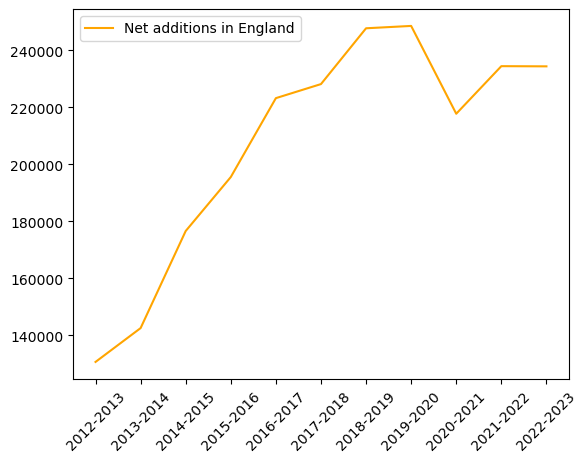

In [12]:
#display(DNA_eng_12_23.columns.to_list()[30:50])

category = "Net Additions"
Dwe_net_net_additions = DNA_eng_12_23[[category+'_12_13',category+'_13_14',category+'_14_15',category+'_15_16',category+'_16_17',category+'_17_18',category+'_18_19',category+'_19_20',category+'_20_21',category+'_21_22',category+'_22_23']].copy()
Dwe_net_net_additions = Dwe_net_net_additions.T
display(Dwe_net_net_additions)

years = np.arange(2012,2023)
time = [str(i)+'-'+str(i+1) for i in years]

ax = sns.lineplot(y=Dwe_net_net_additions["England"],x=time,label="Net additions in England",color='orange')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)

fig = ax.get_figure()
fig.savefig("Output/Net-additions-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

Authority Data,England,Unitary Authorities,Bath and North East Somerset UA,Bedford UA,Blackburn with Darwen UA,...,East Suffolk,West Suffolk,Buckinghamshire UA,North Northamptonshire UA,West Northamptonshire UA
Net Change of use_12_13,12778,3460,101,69,9,...,NaN,NaN,NaN,NaN,NaN
Net Change of use_13_14,12523,3509,68,95,6,...,NaN,NaN,NaN,NaN,NaN
Net Change of use_14_15,20650,6049,97,95,3,...,NaN,NaN,NaN,NaN,NaN
Net Change of use_15_16,30598,7533,41,114,17,...,NaN,NaN,NaN,NaN,NaN
Net Change of use_16_17,37189,8955,94,276,20,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Net Change of use_18_19,29295,7513,127,260,75,...,NaN,NaN,NaN,NaN,NaN
Net Change of use_19_20,26713,6240,71,116,14,...,79,75,NaN,NaN,NaN
Net Change of use_20_21,21471,7064,108,358,36,...,94,26,369,NaN,NaN
Net Change of use_21_22,22905,6158,170,98,36,...,121,37,423,60,195


/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/2274365935.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


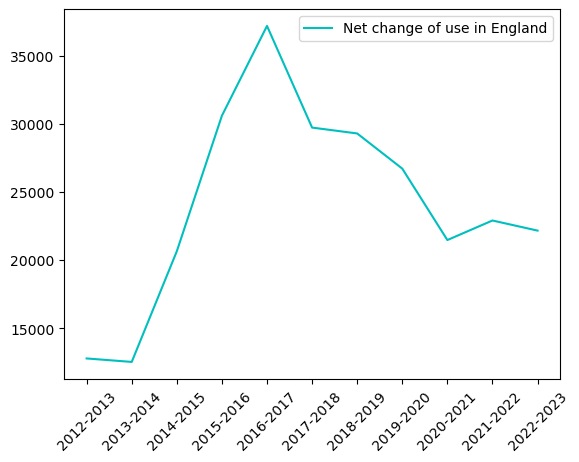

In [13]:
#display(DNA_eng_12_23.columns.to_list()[30:50])

category = "Net Change of use"
Dwe_net_net_change_of_use = DNA_eng_12_23[[category+'_12_13',category+'_13_14',category+'_14_15',category+'_15_16',category+'_16_17',category+'_17_18',category+'_18_19',category+'_19_20',category+'_20_21',category+'_21_22',category+'_22_23']].copy()
Dwe_net_net_change_of_use = Dwe_net_net_change_of_use.T
display(Dwe_net_net_change_of_use)

years = np.arange(2012,2023)
time = [str(i)+'-'+str(i+1) for i in years]

ax = sns.lineplot(y=Dwe_net_net_change_of_use["England"],x=time,label="Net change of use in England",color='c')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)

fig = ax.get_figure()
fig.savefig("Output/Net-change-of-use-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

Authority Data,England,Unitary Authorities,Bath and North East Somerset UA,Bedford UA,Blackburn with Darwen UA,...,East Suffolk,West Suffolk,Buckinghamshire UA,North Northamptonshire UA,West Northamptonshire UA
Net conversions_12_13,4095,701,8,20,5,...,NaN,NaN,NaN,NaN,NaN
Net conversions_13_14,4472,973,7,11,1,...,NaN,NaN,NaN,NaN,NaN
Net conversions_14_15,4945,1130,13,12,2,...,NaN,NaN,NaN,NaN,NaN
Net conversions_15_16,4755,797,44,7,2,...,NaN,NaN,NaN,NaN,NaN
Net conversions_16_17,5680,1149,81,38,17,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Net conversions_18_19,5162,1088,15,16,33,...,NaN,NaN,NaN,NaN,NaN
Net conversions_19_20,4344,706,5,9,5,...,4,4,NaN,NaN,NaN
Net conversions_20_21,3410,891,31,52,12,...,3,5,36,NaN,NaN
Net conversions_21_22,4855,906,3,2,11,...,9,6,34,18,23


/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/189337430.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


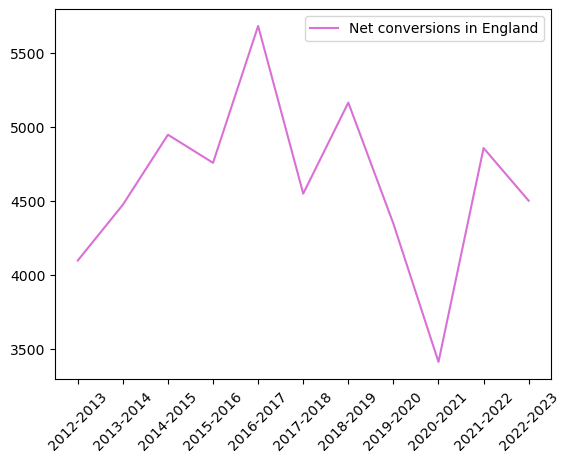

In [14]:
#display(DNA_eng_12_23.columns.to_list()[30:50])

category = "Net conversions"
Dwe_net_net_conversions = DNA_eng_12_23[[category+'_12_13',category+'_13_14',category+'_14_15',category+'_15_16',category+'_16_17',category+'_17_18',category+'_18_19',category+'_19_20',category+'_20_21',category+'_21_22',category+'_22_23']].copy()
Dwe_net_net_conversions = Dwe_net_net_conversions.T
display(Dwe_net_net_conversions)

years = np.arange(2012,2023)
time = [str(i)+'-'+str(i+1) for i in years]

ax = sns.lineplot(y=Dwe_net_net_conversions["England"],x=time,label="Net conversions in England",color='orchid')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)

fig = ax.get_figure()
fig.savefig("Output/Net-conversions-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

Authority Data,England,Unitary Authorities,Bath and North East Somerset UA,Bedford UA,Blackburn with Darwen UA,...,East Suffolk,West Suffolk,Buckinghamshire UA,North Northamptonshire UA,West Northamptonshire UA
Net other gains and losses_12_13,1369,1086,1,5,0,...,NaN,NaN,NaN,NaN,NaN
Net other gains and losses_13_14,1330,767,0,0,0,...,NaN,NaN,NaN,NaN,NaN
Net other gains and losses_14_15,631,129,0,0,0,...,NaN,NaN,NaN,NaN,NaN
Net other gains and losses_15_16,777,283,0,0,0,...,NaN,NaN,NaN,NaN,NaN
Net other gains and losses_16_17,723,133,0,0,1,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Net other gains and losses_18_19,968,273,1,0,0,...,NaN,NaN,NaN,NaN,NaN
Net other gains and losses_19_20,857,387,2,0,2,...,2,0,NaN,NaN,NaN
Net other gains and losses_20_21,643,120,1,0,1,...,2,2,0,NaN,NaN
Net other gains and losses_21_22,766,321,0,0,1,...,2,0,0,0,-3


/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/1044176398.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


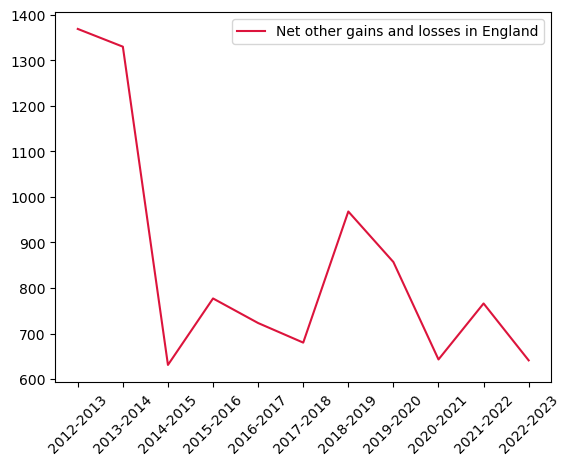

In [15]:
#display(DNA_eng_12_23.columns.to_list()[30:50])

category = "Net other gains and losses"
Dwe_net_other_gandl = DNA_eng_12_23[[category+'_12_13',category+'_13_14',category+'_14_15',category+'_15_16',category+'_16_17',category+'_17_18',category+'_18_19',category+'_19_20',category+'_20_21',category+'_21_22',category+'_22_23']].copy()
Dwe_net_other_gandl = Dwe_net_other_gandl.T
display(Dwe_net_other_gandl)

years = np.arange(2012,2023)
time = [str(i)+'-'+str(i+1) for i in years]

ax = sns.lineplot(y=Dwe_net_other_gandl["England"],x=time,label="Net other gains and losses in England",color='crimson')
ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)

fig = ax.get_figure()
fig.savefig("Output/Net-other-gains-and-losses-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

/var/folders/ys/4kmpmwk95rq2sqjtj685cvcm0000gn/T/ipykernel_24706/2179698399.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time, rotation=45)


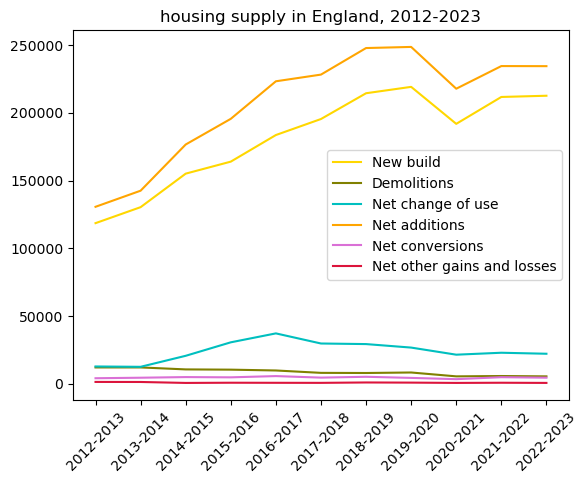

In [16]:
ax = sns.lineplot(y=Dwe_net_new_build["England"],x=time,label="New build",color='gold')
ax = sns.lineplot(y=Dwe_net_demolitions["England"],x=time,label="Demolitions",color='olive')
ax = sns.lineplot(y=Dwe_net_net_change_of_use["England"],x=time,label="Net change of use",color='c')
ax = sns.lineplot(y=Dwe_net_net_additions["England"],x=time,label="Net additions",color='orange')
ax = sns.lineplot(y=Dwe_net_net_conversions["England"],x=time,label="Net conversions",color='orchid')
ax = sns.lineplot(y=Dwe_net_other_gandl["England"],x=time,label="Net other gains and losses",color='crimson')

ax.set(xlabel=None, ylabel=None)
ax.ticklabel_format(style='scientific', axis='y')
ax.set_xticklabels(time, rotation=45)
ax.set_title("housing supply in England, 2012-2023")

fig = ax.get_figure()
fig.savefig("Output/Evolutions-Eng-2012-2023.png",dpi=300,bbox_inches="tight")

11
11


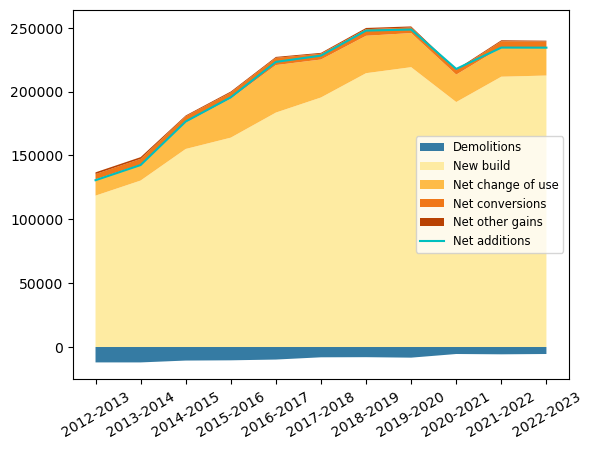

In [72]:
y_minus = [-x for x in Dwe_net_demolitions["England"].to_list()]

y_plus = [
    Dwe_net_new_build["England"].to_list(),
    Dwe_net_net_change_of_use["England"].to_list(),
    Dwe_net_net_conversions["England"].to_list(),
    Dwe_net_other_gandl["England"].to_list()
]

y = Dwe_net_net_additions["England"].to_list()

print(len(y))
print(len(time))

col = sns.color_palette("mako", 1)
cols = sns.color_palette("YlOrBr", 4)

plt.stackplot(time,y_minus, labels=['Demolitions'], colors=col)
plt.stackplot(time,y_plus, labels=['New build','Net change of use','Net conversions','Net other gains'], colors=cols)
plt.plot(time,y,'c',label='Net additions')

plt.xticks(rotation=30)
plt.legend(loc='center right',fontsize='small')

plt.savefig("Output/Evo-Dwe-Eng-2012-2023.png",dpi=300,bbox_inches="tight")
plt.show()

# Background from the data : the housing supply

Net additional dwellings statistics, also known as ‘net additions’, measure the absolute change in stock between one year and the next, including:

* losses and gains from new builds,
* conversions,
* changes of use (for example a residential house to an office) 
* demolitions. 

`Net additions` = `new build completions` + `conversions` + `change of use` + `other net gains` - `demolitions`. 

New build figures from the net supply of housing data may not correspond to new build data from the quarterly housebuilding series, as data collected for the net supply of housing is over a longer period and may pick up some elements missing from the quarterly P2 collections. 